In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import warnings
from matplotlib import pyplot as plt
import numpy as np
u= mda.Universe("vars/output_no_water.gro", "vars/output_no_water.xtc")
NUM_RES = 59
NUM_PROTEINS = 30
PROTEIN_LEN = 986
RNA_LEN = 707 # indicates the rna length
NUM_RNA = 30
NUM_RES_RNA = 22 #how many RESIDUES (nucleotide bases) in one rna
RNA_START_INDEX = NUM_PROTEINS * PROTEIN_LEN

all_prot = u.select_atoms(f"bynum 1:{NUM_PROTEINS* PROTEIN_LEN}")
all_rna = u.select_atoms(f"bynum {RNA_START_INDEX+1}:{RNA_START_INDEX + RNA_LEN*NUM_RNA}")
all_mol = u.select_atoms(f"bynum 1:{RNA_START_INDEX + RNA_LEN*NUM_RNA}")

prot1 = u.select_atoms(f"bynum 1:{PROTEIN_LEN}")
prot2 = u.select_atoms(f"bynum {PROTEIN_LEN+1}:{2*PROTEIN_LEN}")
print(len(prot1))
prot2_50 = u.select_atoms(f"bynum {PROTEIN_LEN+1}:{NUM_PROTEINS * PROTEIN_LEN}")

rna1 = u.select_atoms(f"bynum {RNA_START_INDEX+1}:{RNA_START_INDEX + RNA_LEN}")
rna2_all_others = u.select_atoms(f"bynum {RNA_START_INDEX +RNA_LEN + 1}:{RNA_START_INDEX+NUM_RNA * RNA_LEN}")
prot2_50_rna = u.select_atoms(f"bynum {PROTEIN_LEN+1}:{RNA_START_INDEX + RNA_LEN*NUM_RNA}")

print(len(prot2_50))
args = [[all_prot, all_prot]]

# rdf = InterRDF(prot1, all_prot)
# # can skip frames
# rdf.run(start=1, stop=2)

# plt.plot(rdf.bins, rdf.rdf)
# print(len(rdf.rdf))

/opt/conda/envs/gromacs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


986
28594


/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/tmp/ipykernel_51716/3065063176.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


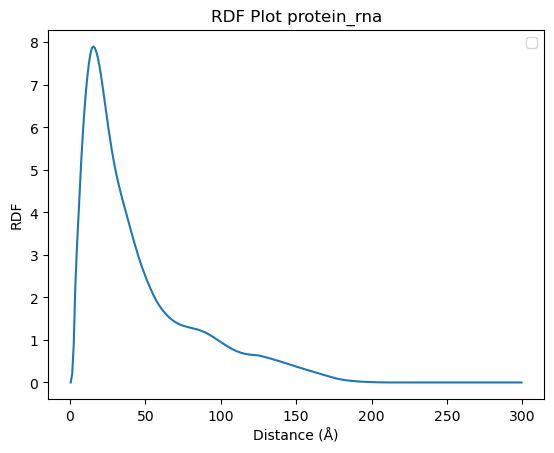

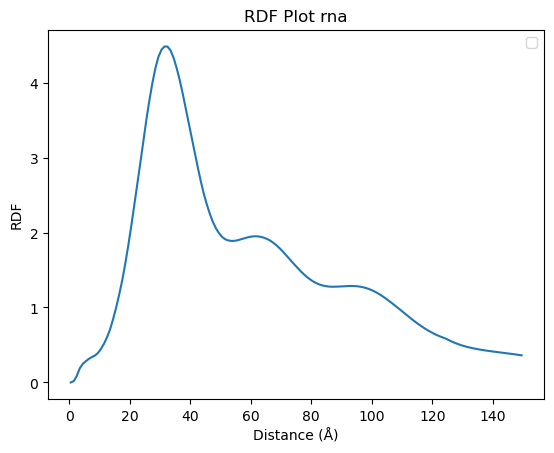

In [2]:
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
import os
import csv

def run_rdf_analysis(group1, group2, box_size=300, name=""):
    rdf = InterRDF(group1, group2, range=(0,box_size), nbins=int(box_size))
    rdf.run()
    results = rdf
    plt.plot(rdf.bins, rdf.rdf)
    plt.xlabel("Distance (Å)")
    plt.ylabel("RDF")
    plt.legend()
    plt.title(f"RDF Plot {name}")
    plt.show()
    return results
# Define AtomGroups for the RDF calculation
def save_rdf(results, output_file):
    output_path = "results/rdf/"
    if not os.path.isdir(output_path):
        os.makedirs(output_path, exist_ok=True)
    with open(output_path+output_file, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        header = ["Distance (Å)", "RDF"]
        writer.writerow(header)
        for row in zip(results.bins, results.rdf):
            writer.writerow(row)
    
            
output_file = "rdf_protein_total.csv"
ag1 = prot1
ag2 = prot2_50

# res = run_rdf_analysis(ag1, ag2, box_size=300, name="protein_total")
# save_rdf(res,  "rdf_protein_total.csv")
res2 = run_rdf_analysis(prot1, prot2_50_rna, box_size=300, name="protein_rna")
save_rdf(res2,  "rdf_protein_rna.csv")
res3 = run_rdf_analysis(rna1, rna2_all_others, box_size=150, name="rna")
save_rdf(res3,  "rdf_rna.csv")
# rdf_prot = InterRDF(ag1, ag2, range=(0, 300), nbins = 300)
# rdf_prot.run()

# # Store the RDF result for this window
# results = rdf_prot.rdf

# plt.plot(rdf_prot.bins, rdf_prot.rdf)

# plt.xlabel("Distance (Å)")
# plt.ylabel("RDF")
# plt.legend()
# plt.title("RDF Changes Over Time")
# plt.show()


/tmp/ipykernel_51716/3065063176.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


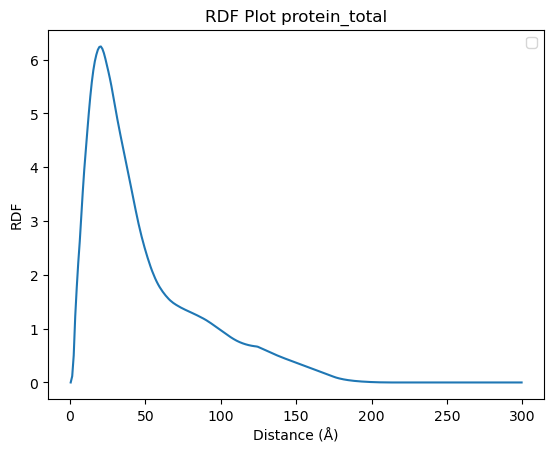

In [3]:
res = run_rdf_analysis(ag1, ag2, box_size=300, name="protein_total")
save_rdf(res,  "rdf_protein_total.csv")

In [2]:
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
import os
import csv

# Define AtomGroups for the RDF calculation
ag1 = prot1
ag2 = prot2_50

# Parameters
num_frames = len(u.trajectory)
num_windows = 4


# Ensure the results rdf folder exists
output_path = "results/rdf/"
if not os.path.isdir(output_path):
    os.makedirs(output_path, exist_ok=True)

def rdf_evol(group1, group2, num_frames, num_windows=4, output_csv="rdf_results.csv"):
    rdf_results = []
    frames_per_window = int(num_frames / num_windows)
    bins = None  # To store the bins once (common for all windows)
    
    for i in range(num_windows):
        start_frame = i * frames_per_window
        stop_frame = start_frame + frames_per_window
        rdf = InterRDF(group1, group2, range=(0, 300), nbins=300)
        rdf.run(start=start_frame, stop=stop_frame)
        
        # Save bins only once
        if bins is None:
            bins = rdf.results.bins
        
        # Append RDF values
        rdf_results.append(rdf.results.rdf)
        
        # Plot the RDF for the window
        plt.plot(rdf.results.bins, rdf.results.rdf, label=f"Window {i+1} ({start_frame}-{stop_frame})")
    
    plt.xlabel("Distance (Å)")
    plt.ylabel("RDF")
    plt.legend()
    plt.title("RDF Changes Over Time")
    plt.show()
    
    # Write RDF results to CSV
    with open(output_csv, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        
        # Write header
        header = ["Distance (Å)"] + [f"Window {i+1}" for i in range(num_windows)]
        writer.writerow(header)
        
        # Write rows
        for row in zip(bins, *rdf_results):
            writer.writerow(row)
    
    return rdf_results



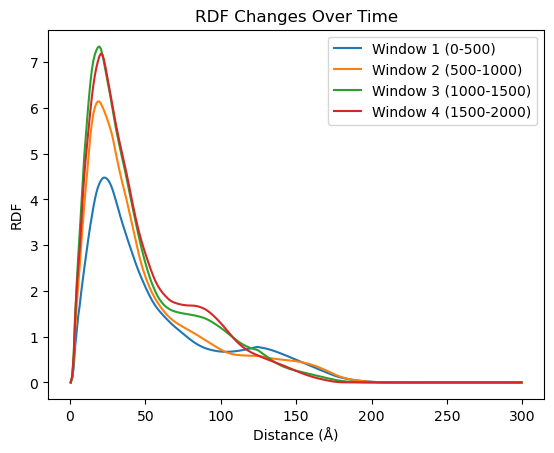

[array([0.00000000e+00, 8.97500581e-02, 3.32436576e-01, 7.93151298e-01,
        1.11552084e+00, 1.45416745e+00, 1.68999214e+00, 1.98076376e+00,
        2.23860796e+00, 2.49467226e+00, 2.73352814e+00, 2.97860667e+00,
        3.21220401e+00, 3.42948951e+00, 3.63030940e+00, 3.82238212e+00,
        3.99529715e+00, 4.14249383e+00, 4.25963747e+00, 4.34320039e+00,
        4.41015795e+00, 4.45676048e+00, 4.47625867e+00, 4.47354067e+00,
        4.45104929e+00, 4.41335197e+00, 4.35687231e+00, 4.28210240e+00,
        4.19004832e+00, 4.08373003e+00, 3.97032864e+00, 3.85191032e+00,
        3.73399868e+00, 3.61925350e+00, 3.50921849e+00, 3.40480088e+00,
        3.29985833e+00, 3.19731962e+00, 3.09676931e+00, 2.99961859e+00,
        2.90072836e+00, 2.80331201e+00, 2.70622226e+00, 2.61259477e+00,
        2.52205450e+00, 2.43594760e+00, 2.35438432e+00, 2.27644870e+00,
        2.20021219e+00, 2.12563142e+00, 2.05294522e+00, 1.98169570e+00,
        1.91400331e+00, 1.84972293e+00, 1.78975429e+00, 1.734421

In [3]:
output_csv = "windowed_rdf_proteins.csv"
full_path = output_path + output_csv
rdf_evol(ag1, ag2, num_frames, num_windows=4, output_csv=full_path)

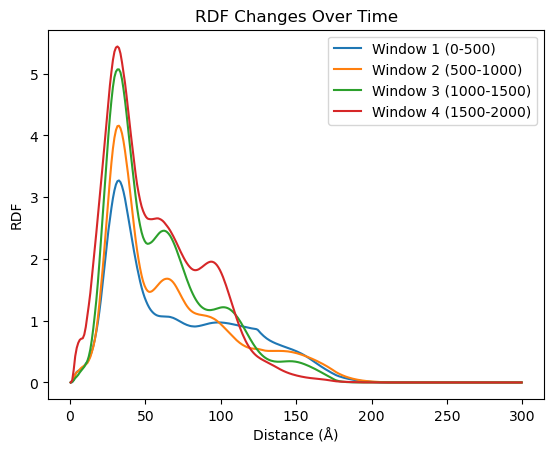

[array([0.00000000e+00, 3.53890717e-03, 3.90344121e-02, 1.33002789e-01,
        1.69196229e-01, 1.88945420e-01, 1.99209822e-01, 2.17132745e-01,
        2.39902494e-01, 2.69740467e-01, 3.02594127e-01, 3.37371572e-01,
        3.79158923e-01, 4.33073880e-01, 5.03737837e-01, 5.91021337e-01,
        6.97873236e-01, 8.22419361e-01, 9.69257889e-01, 1.14413529e+00,
        1.34061397e+00, 1.55735571e+00, 1.78257114e+00, 2.01322110e+00,
        2.24323850e+00, 2.46047645e+00, 2.64873345e+00, 2.82405527e+00,
        2.98303383e+00, 3.11065041e+00, 3.20570050e+00, 3.25991327e+00,
        3.27160952e+00, 3.24349303e+00, 3.18035303e+00, 3.09133964e+00,
        2.97725557e+00, 2.84135864e+00, 2.69770067e+00, 2.55176483e+00,
        2.40380765e+00, 2.26077599e+00, 2.12351988e+00, 1.99143530e+00,
        1.86613977e+00, 1.74805694e+00, 1.63864308e+00, 1.53949378e+00,
        1.45377961e+00, 1.37930820e+00, 1.31702957e+00, 1.26165945e+00,
        1.21505424e+00, 1.17654371e+00, 1.14621043e+00, 1.121683

In [4]:
output_csv = "windowed_rdf_rna.csv"
full_path = output_path + output_csv
rdf_evol(rna1, rna2_all_others, num_frames, num_windows=4, output_csv=full_path)


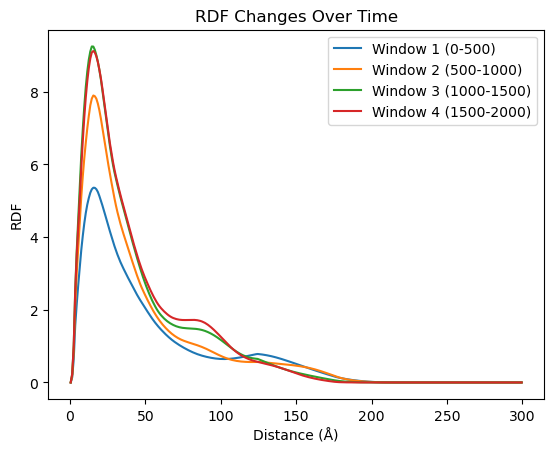

[array([0.00000000e+00, 1.43520151e-01, 6.35594050e-01, 1.56749399e+00,
        2.15847420e+00, 2.68469402e+00, 3.14790211e+00, 3.63797776e+00,
        4.02892807e+00, 4.37402342e+00, 4.66203186e+00, 4.89338817e+00,
        5.07292652e+00, 5.22007479e+00, 5.31420480e+00, 5.35667693e+00,
        5.35377577e+00, 5.31607986e+00, 5.24123525e+00, 5.13055584e+00,
        5.00422161e+00, 4.87279304e+00, 4.73476344e+00, 4.59021340e+00,
        4.44492698e+00, 4.30049394e+00, 4.15861285e+00, 4.02141882e+00,
        3.88553237e+00, 3.75392510e+00, 3.63169191e+00, 3.51769263e+00,
        3.40997676e+00, 3.31042043e+00, 3.21768046e+00, 3.13144751e+00,
        3.04711227e+00, 2.96386945e+00, 2.88219461e+00, 2.80271625e+00,
        2.72237748e+00, 2.64283972e+00, 2.56362048e+00, 2.48691156e+00,
        2.41191805e+00, 2.33997083e+00, 2.27108454e+00, 2.20508536e+00,
        2.13930755e+00, 2.07384999e+00, 2.00896270e+00, 1.94448230e+00,
        1.88105600e+00, 1.81869550e+00, 1.75854348e+00, 1.700867

In [5]:
output_csv = "windowed_rdf_all.csv"
full_path = output_path + output_csv
rdf_evol(prot1, prot2_50_rna, num_frames, num_windows=4, output_csv=full_path)